In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
avocados = "Resources/avocado.csv"
avocados2015 = "Resources/avocado2015.csv"
avocados2016 = "Resources/avocado2016.csv"
avocados2017 = "Resources/avocado2017.csv"

# Read the Avocado Data
avocado_data = pd.read_csv(avocados).rename(columns={"Unnamed: 0": "Index","4046":"Small Hass","4225":"Large Hass","4770":"XLarge Hass"})
avocado_data2015 = pd.read_csv(avocados2015).rename(columns={"Unnamed: 0": "Index","4046":"Small Hass","4225":"Large Hass","4770":"XLarge Hass"})
avocado_data2016 = pd.read_csv(avocados2016).rename(columns={"Unnamed: 0": "Index","4046":"Small Hass","4225":"Large Hass","4770":"XLarge Hass"})
avocado_data2017 = pd.read_csv(avocados2017).rename(columns={"Unnamed: 0": "Index","4046":"Small Hass","4225":"Large Hass","4770":"XLarge Hass"})
#preview avocado DF      
avocado_data.head()    

,Index,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/15,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/15,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/15,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/15,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/15,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### Start Finding Math

In [2]:
#total Avocado Volume
total_volume = (avocado_data["Total Volume"]).sum()

#Total Small Avocados Sold
total_small_hass = (avocado_data["Small Hass"]).sum()

#Total Large Avocados Sold
total_large_hass = (avocado_data["Large Hass"]).sum()

#Total X-tra Large Avocados Sold
total_xlarge_hass = (avocado_data["XLarge Hass"]).sum()

#Total Average Price of Avocados
overall_avg_price = (avocado_data["AveragePrice"]).mean()

#Minimum Average Price of Avocados
min_avg_price = (avocado_data["AveragePrice"]).min()

#Maximum Average Price of Avocados
max_avg_price = (avocado_data["AveragePrice"]).max()

# Standard Deviation of Average Price of Avocados
std = (avocado_data["AveragePrice"]).sem()

In [3]:
## Average Price of Avocado's by Region
# Sort avocado data by region
region_data = avocado_data.groupby('region')

# Average price of avocados by region
regional_mean = region_data['AveragePrice'].mean()

# Avocado min by region
regional_min = region_data['AveragePrice'].min()

# Avocado max by region
regional_max = region_data['AveragePrice'].max()

# Total difference in min/max by region
difference = regional_max - regional_min

# Standard deviation of Avocado Prices by Region
regional_std = region_data['AveragePrice'].sem()

In [4]:
avocado_summary = pd.merge(regional_mean,regional_min, on='region',how='outer').rename(columns={"AveragePrice_x": "Average Price","AveragePrice_y":"Minimum Price"})
avocado_summary = pd.merge(avocado_summary,regional_max, on='region',how='outer').rename(columns={"AveragePrice": "Maximum Price"})
avocado_summary = pd.merge(avocado_summary,difference, on='region',how='outer').rename(columns={"AveragePrice": "Min/Max Delta"})
avocado_summary = pd.merge(avocado_summary,regional_std, on='region',how='outer').rename(columns={"AveragePrice": "Standard Deviation"})
avocado_summary = avocado_summary.reset_index(drop=False)

,region,Average Price,Minimum Price,Maximum Price,Min/Max Delta,Standard Deviation
0,Albany,1.570605,0.85,2.13,1.28,0.016716
1,Atlanta,1.341720,0.62,2.75,2.13,0.022869
2,BaltimoreWashington,1.546146,0.95,2.28,1.33,0.017186
3,Boise,1.337102,0.58,2.79,2.21,0.026243
4,Boston,1.527389,0.85,2.19,1.34,0.018768
5,BuffaloRochester,1.539045,1.04,2.57,1.53,0.015319
6,California,1.394108,0.67,2.58,1.91,0.022180
7,Charlotte,1.615478,0.80,2.83,2.03,0.023726
8,Chicago,1.556401,0.70,2.30,1.60,0.019402
9,CincinnatiDayton,1.204108,0.44,2.20,1.76,0.019813


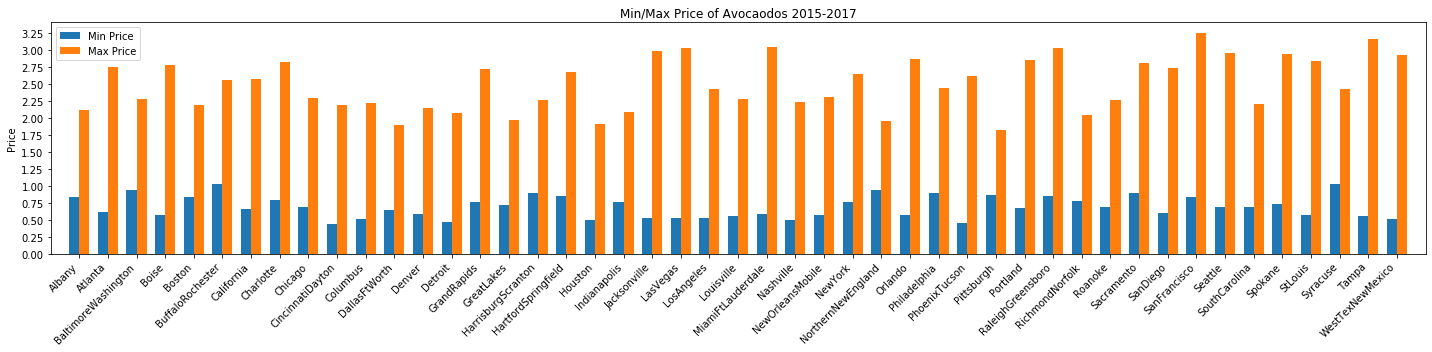

In [5]:
labels = avocado_summary
labels_name = avocado_summary['region']

min_price = labels['Minimum Price']

max_price = labels['Maximum Price']

x = np.arange(len(labels_name))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,5))
rects1 = ax.bar(x - width/2, min_price, width, label='Min Price')
rects2 = ax.bar(x + width/2, max_price, width, label='Max Price')

ax.set_ylabel('Price')
ax.set_title('Min/Max Price of Avocaodos 2015-2017')
ax.set_xticks(x)
ax.set_yticks(np.arange(0, max_price.max() + 0.1, step=0.25))
ax.set_xticklabels(labels_name, rotation = 45, ha="right")
ax.legend()
plt.xlim(-1.0,len(x))
ax.tick_params(which='minor', width=1.00)


fig.tight_layout()

plt.savefig("Resources/screenshots/MinMaxPrices.svg")

plt.show()

In [6]:
# Grouping Avocado Data by Type of Avocado
type_data = avocado_data.groupby('type')

# Average Price of Avocados by Type
average_price_type = type_data['AveragePrice'].mean()

#Minimum Average Price
min_type_price = type_data['AveragePrice'].min()

#Maximum Average Price
max_type_price = type_data['AveragePrice'].max()

#Price Delta
delta_type_price = max_type_price - min_type_price

#Standard Deviation
std_type_price = type_data['AveragePrice'].sem()

In [7]:
type_df = pd.merge(average_price_type,min_type_price, on='type', how='outer').rename(columns={"AveragePrice_x": "Average Price","AveragePrice_y":"Minimum Price"})
type_df = pd.merge(type_df, max_type_price, on='type', how='outer').rename(columns={"AveragePrice": "Maximum Price"})
type_df = pd.merge(type_df, delta_type_price, on='type', how='outer').rename(columns={"AveragePrice": "Min/Max Delta"})
type_df = pd.merge(type_df, std_type_price, on='type', how='outer').rename(columns={"AveragePrice": "Standard Deviation"})

type_df.reset_index(drop=False)

,Average Price,Minimum Price,Maximum Price,Min/Max Delta,Standard Deviation
type,,,,,
conventional,1.166211,0.46,2.22,1.76,0.003156
organic,1.668158,0.44,3.25,2.81,0.004462


In [8]:
# Grouping Avocado Data by Type of Avocado
combo_data = avocado_data.groupby(['region','type'])

In [9]:
# Average Price of Avocados by Type
combo_average_price_type = combo_data['AveragePrice'].mean()

# Minimum Average Price
combo_min_type_price = combo_data['AveragePrice'].min()

#Maximum Average Price
combo_max_type_price = combo_data['AveragePrice'].max()

#Delta
combo_delta_type_price = combo_max_type_price - combo_min_type_price

# Combo Standard Deviation
combo_std_type_price = combo_data['AveragePrice'].sem()

#regional total volume by type of avocado
regional_total_volume = combo_data['Total Volume'].sum()

region               type        
Albany               conventional    1.421068e+07
                     organic         3.151328e+05
Atlanta              conventional    7.862595e+07
                     organic         1.747745e+06
BaltimoreWashington  conventional    1.191987e+08
Name: Total Volume, dtype: float64

In [10]:
region_type_df = (pd.merge(combo_average_price_type,combo_min_type_price, on=['region','type'], how='outer').rename(columns={"AveragePrice_x": "Average Price","AveragePrice_y":"Minimum Price"}))
region_type_df = pd.merge(region_type_df, combo_max_type_price, on=['region','type'], how='outer').rename(columns={"AveragePrice": "Maximum Price"})
region_type_df = pd.merge(region_type_df, combo_delta_type_price, on=['region','type'], how='outer').rename(columns={"AveragePrice": "Min/Max Delta"})
region_type_df = pd.merge(region_type_df, combo_std_type_price, on=['region','type'], how='outer').rename(columns={"AveragePrice": "Min/Max Delta"})
region_type_df = pd.merge(region_type_df, regional_total_volume/1000000, on=['region','type'], how='outer').rename(columns={"Total Volume": "Total Volume (in millions)"})

Average Price  Minimum Price  Maximum Price  \
region              type                                                        
Albany              conventional       1.349172           0.85           1.80   
                    organic            1.792038           1.38           2.13   
Atlanta             conventional       1.073312           0.68           1.64   
                    organic            1.610127           0.62           2.75   
BaltimoreWashington conventional       1.347516           0.95           1.86   
                    organic            1.744777           1.15           2.28   
Boise               conventional       1.068089           0.58           1.89   
                    organic            1.606115           0.72           2.79   
Boston              conventional       1.302038           0.85           1.81   
                    organic            1.752739           1.13           2.19   
BuffaloRochester    conventional       1.392675           1.04           1.71   
                    organic            1.685414           1.14           2.57   
California          conventional       1.107452           0.67           1.78   
                    organic            1.680764           1.10           2.58   
Charlotte           conventional       1.277070           0.80           1.77   
                    organic            1.953885           1.26           2.83   
Chicago             conventional       1.365223           0.70           2.22   
                    organic            1.747580           1.08           2.30   
CincinnatiDayton    conventional       1.020064           0.60           1.90   
                    organic            1.388153           0.44           2.20   
Columbus            conventional       1.073949           0.69           1.83   
                    organic            1.444013           0.52           2.22   
DallasFtWorth       conventional       0.849618           0.65           1.30   
                    organic            1.318917           0.86           1.90   
Denver              conventional       1.076051           0.60           1.60   
                    organic            1.351592           0.66           2.16   
Detroit             conventional       1.130000           0.65           1.94   
                    organic            1.437197           0.48           2.08   
GrandRapids         conventional       1.320255           0.77           2.19   
                    organic            1.716752           1.10           2.73   
...                                         ...            ...            ...   
Pittsburgh          conventional       1.257389           0.87           1.60   
                    organic            1.484841           1.15           1.83   
Portland            conventional       1.041401           0.68           1.90   
                    organic            1.582038           0.68           2.86   
RaleighGreensboro   conventional       1.229618           0.86           1.70   
                    organic            1.883694           1.15           3.04   
RichmondNorfolk     conventional       1.122930           0.78           1.62   
                    organic            1.468344           0.93           2.05   
Roanoke             conventional       1.103248           0.81           1.66   
                    organic            1.386815           0.70           2.27   
Sacramento          conventional       1.282994           0.91           1.87   
                    organic            1.982994           1.13           2.82   
SanDiego            conventional       1.057070           0.61           1.83   
                    organic            1.727070           1.05           2.74   
SanFrancisco        conventional       1.412930           0.84           2.20   
                    organic            2.234395           1.06           3.25   
Seattle             conventional       1.157771           0.75   

In [11]:
labels = region_type_df.reset_index(drop=False)
labels_name = labels['region'].unique()

min_price_conventional = labels[labels['type']=='conventional']['Minimum Price']

min_price_organic = labels[labels['type']=='organic']['Minimum Price']

max_price_conventional = labels[labels['type']=='conventional']['Maximum Price']

max_price_organic = labels[labels['type']=='organic']['Maximum Price']

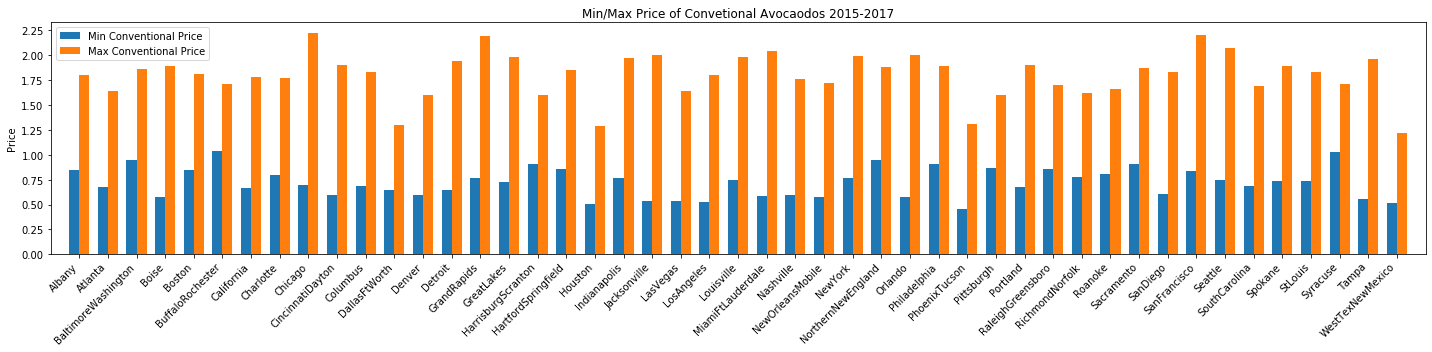

In [12]:
x = np.arange(len(labels_name))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,5))
rects1 = ax.bar(x - width/2, min_price_conventional, width, label='Min Conventional Price')
rects2 = ax.bar(x + width/2, max_price_conventional, width, label='Max Conventional Price')

ax.set_ylabel('Price')
ax.set_title('Min/Max Price of Convetional Avocaodos 2015-2017')
ax.set_xticks(x)
ax.set_yticks(np.arange(0, max_price_conventional.max() + 0.1, step=0.25))
ax.set_xticklabels(labels_name, rotation = 45, ha="right")
ax.legend()
plt.xlim(-1.0,len(x))
ax.tick_params(which='minor', width=1.00)


fig.tight_layout()

plt.savefig("Resources/screenshots/MinMaxConventionalPrices.svg")

plt.show()

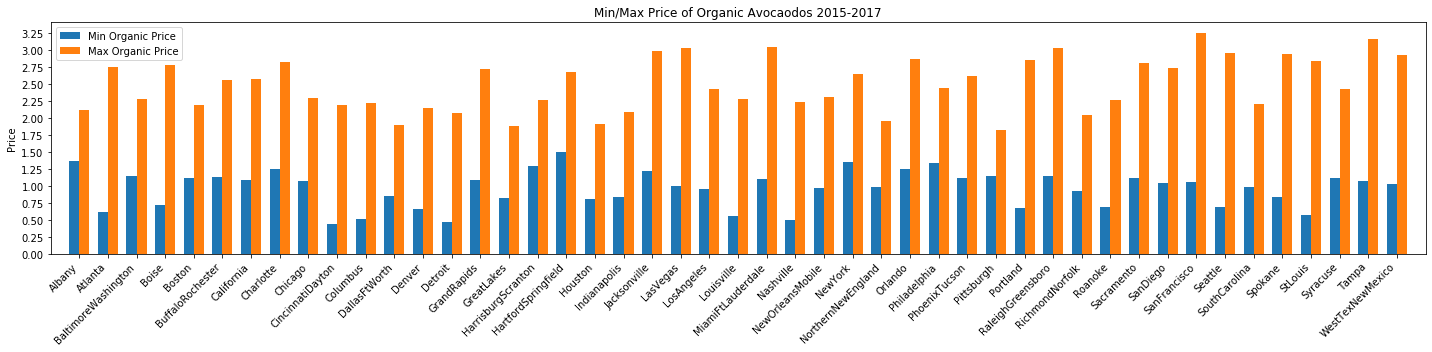

In [13]:
x = np.arange(len(labels_name))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,5))
rects1 = ax.bar(x - width/2, min_price_organic, width, label='Min Organic Price')
rects2 = ax.bar(x + width/2, max_price_organic, width, label='Max Organic Price')

ax.set_ylabel('Price')
ax.set_title('Min/Max Price of Organic Avocaodos 2015-2017')
ax.set_xticks(x)
ax.set_yticks(np.arange(0, max_price_organic.max() + 0.1, step=0.25))
ax.set_xticklabels(labels_name, rotation = 45, ha="right")
ax.legend()
plt.xlim(-1.0,len(x))
ax.tick_params(which='minor', width=1.00)


fig.tight_layout()

plt.savefig("Resources/screenshots/MinMaxOrganicPrices.svg")

plt.show()

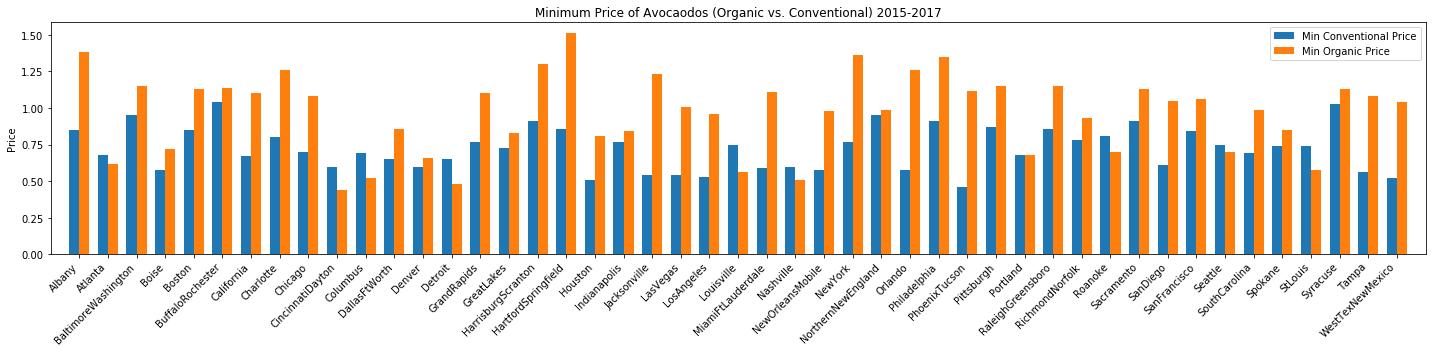

In [14]:
x = np.arange(len(labels_name))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,5))
rects1 = ax.bar(x - width/2, min_price_conventional, width, label='Min Conventional Price')
rects2 = ax.bar(x + width/2, min_price_organic, width, label='Min Organic Price')

ax.set_ylabel('Price')
ax.set_title('Minimum Price of Avocaodos (Organic vs. Conventional) 2015-2017')
ax.set_xticks(x)
ax.set_yticks(np.arange(0, min_price_organic.max() + 0.1, step=0.25))
ax.set_xticklabels(labels_name, rotation = 45, ha="right")
ax.legend()
plt.xlim(-1.0,len(x))
ax.tick_params(which='minor', width=1.00)


fig.tight_layout()

plt.savefig("Resources/screenshots/MinPricesComparison.svg")

plt.show()

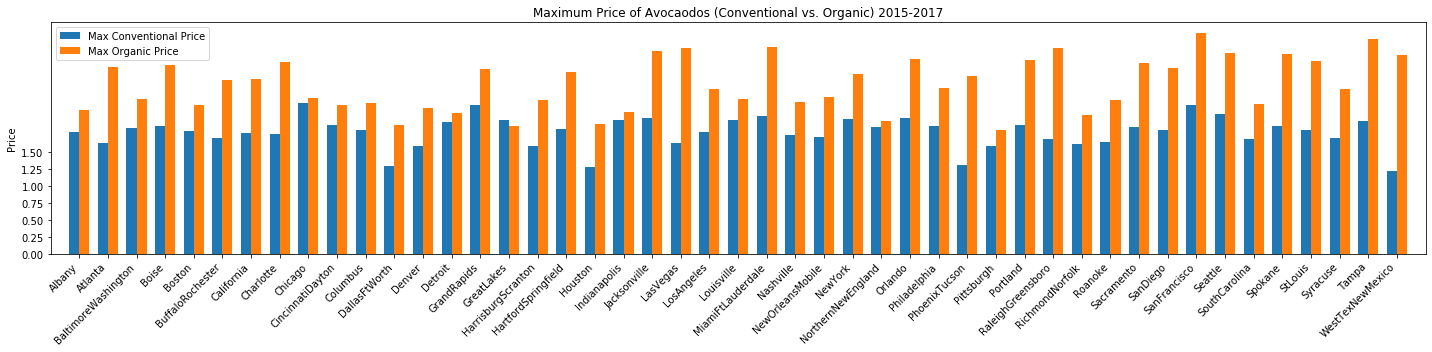

In [15]:
x = np.arange(len(labels_name))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,5))
rects1 = ax.bar(x - width/2, max_price_conventional, width, label='Max Conventional Price')
rects2 = ax.bar(x + width/2, max_price_organic, width, label='Max Organic Price')

ax.set_ylabel('Price')
ax.set_title('Maximum Price of Avocaodos (Conventional vs. Organic) 2015-2017')
ax.set_xticks(x)
ax.set_yticks(np.arange(0, min_price_organic.max() + 0.1, step=0.25))
ax.set_xticklabels(labels_name, rotation = 45, ha="right")
ax.legend()
plt.xlim(-1.0,len(x))
ax.tick_params(which='minor', width=1.00)


fig.tight_layout()

plt.savefig("Resources/screenshots/MaxPricesComparison.svg")

plt.show()

In [16]:
# Sort avocado data by region
region_data2015 = avocado_data2015.groupby('region')

# Average price of avocados by region
regional_mean2015 = region_data2015['AveragePrice'].mean()

# Avocado min by region
regional_min2015 = region_data2015['AveragePrice'].min()

# Avocado max by region
regional_max2015 = region_data2015['AveragePrice'].max()

# Total difference in min/max by region
difference2015 = regional_max2015 - regional_min2015

# Standard deviation of Avocado Prices by Region
regional_std2015 = region_data2015['AveragePrice'].sem()

In [17]:
avocado_summary2015 = pd.merge(regional_mean2015,regional_min2015, on='region',how='outer').rename(columns={"AveragePrice_x": "Average Price","AveragePrice_y":"Minimum Price"})
avocado_summary2015 = pd.merge(avocado_summary2015,regional_max2015, on='region',how='outer').rename(columns={"AveragePrice": "Maximum Price"})
avocado_summary2015 = pd.merge(avocado_summary2015,difference2015, on='region',how='outer').rename(columns={"AveragePrice": "Min/Max Delta"})
avocado_summary2015 = pd.merge(avocado_summary2015,regional_std2015, on='region',how='outer').rename(columns={"AveragePrice": "Standard Deviation"})
avocado_summary2015 = avocado_summary2015.style.format({'Average Price':'${:,.2f}',
                             'Minimum Price':'${:,.2f}',
                             'Maximum Price':'${:,.2f}',
                            'Min/Max Delta':'${:,.2f}'})

,Average Price,Minimum Price,Maximum Price,Min/Max Delta,Standard Deviation
region,,,,,
Albany,$1.54,$0.93,$2.09,$1.16,0.0378614
Atlanta,$1.38,$0.93,$2.04,$1.11,0.0364461
BaltimoreWashington,$1.37,$0.99,$1.81,$0.82,0.0231598
Boise,$1.37,$0.71,$2.35,$1.64,0.0398663
Boston,$1.47,$0.94,$2.19,$1.25,0.0391133
BuffaloRochester,$1.54,$1.23,$2.02,$0.79,0.0182173
Charlotte,$1.58,$0.95,$2.29,$1.34,0.0438922
Chicago,$1.40,$0.91,$1.87,$0.96,0.0268256
CincinnatiDayton,$1.20,$0.79,$1.66,$0.87,0.0250724


In [18]:
# Sort avocado data by region
region_data2016 = avocado_data2016.groupby('region')

# Average price of avocados by region
regional_mean2016 = region_data2016['AveragePrice'].mean()

# Avocado min by region
regional_min2016 = region_data2016['AveragePrice'].min()

# Avocado max by region
regional_max2016 = region_data2016['AveragePrice'].max()

# Total difference in min/max by region
difference2016 = regional_max2016 - regional_min2016

# Standard deviation of Avocado Prices by Region
regional_std2016 = region_data2016['AveragePrice'].sem()

In [19]:
avocado_summary2016 = pd.merge(regional_mean2016,regional_min2016, on='region',how='outer').rename(columns={"AveragePrice_x": "Average Price","AveragePrice_y":"Minimum Price"})
avocado_summary2016 = pd.merge(avocado_summary2016,regional_max2016, on='region',how='outer').rename(columns={"AveragePrice": "Maximum Price"})
avocado_summary2016 = pd.merge(avocado_summary2016,difference2016, on='region',how='outer').rename(columns={"AveragePrice": "Min/Max Delta"})
avocado_summary2016 = pd.merge(avocado_summary2016,regional_std2016, on='region',how='outer').rename(columns={"AveragePrice": "Standard Deviation"})
avocado_summary2016 = avocado_summary2016.style.format({'Average Price':'${:,.2f}',
                             'Minimum Price':'${:,.2f}',
                             'Maximum Price':'${:,.2f}',
                            'Min/Max Delta':'${:,.2f}'})
avocado_summary2016

,Average Price,Minimum Price,Maximum Price,Min/Max Delta,Standard Deviation
region,,,,,
Albany,$1.53,$0.85,$2.00,$1.15,0.0247661
Atlanta,$1.21,$0.68,$2.29,$1.61,0.0346482
BaltimoreWashington,$1.59,$0.95,$2.28,$1.33,0.0318816
Boise,$1.14,$0.58,$2.24,$1.66,0.0371243
Boston,$1.43,$0.85,$2.00,$1.15,0.0262205
BuffaloRochester,$1.48,$1.04,$2.13,$1.09,0.0221604
Charlotte,$1.50,$0.80,$2.03,$1.23,0.0287403
Chicago,$1.55,$0.82,$2.30,$1.48,0.0382584
CincinnatiDayton,$1.09,$0.64,$1.73,$1.09,0.0220784


In [20]:
# Sort avocado data by region
region_data2017 = avocado_data2017.groupby('region')

# Average price of avocados by region
regional_mean2017 = region_data2017['AveragePrice'].mean()

# Avocado min by region
regional_min2017 = region_data2017['AveragePrice'].min()

# Avocado max by region
regional_max2017 = region_data2017['AveragePrice'].max()

# Total difference in min/max by region
difference2017 = regional_max2017 - regional_min2017

# Standard deviation of Avocado Prices by Region
regional_std2017 = region_data2017['AveragePrice'].sem()

In [21]:
avocado_summary2017 = pd.merge(regional_mean2017,regional_min2017, on='region',how='outer').rename(columns={"AveragePrice_x": "Average Price","AveragePrice_y":"Minimum Price"})
avocado_summary2017 = pd.merge(avocado_summary2017,regional_max2017, on='region',how='outer').rename(columns={"AveragePrice": "Maximum Price"})
avocado_summary2017 = pd.merge(avocado_summary2017,difference2017, on='region',how='outer').rename(columns={"AveragePrice": "Min/Max Delta"})
avocado_summary2017 = pd.merge(avocado_summary2017,regional_std2017, on='region',how='outer').rename(columns={"AveragePrice": "Standard Deviation"})
avocado_summary2017 = avocado_summary2017.style.format({'Average Price':'${:,.2f}',
                             'Minimum Price':'${:,.2f}',
                             'Maximum Price':'${:,.2f}',
                            'Min/Max Delta':'${:,.2f}'})

,Average Price,Minimum Price,Maximum Price,Min/Max Delta,Standard Deviation
region,,,,,
Albany,$1.64,$1.13,$2.13,$1.00,0.0207946
Atlanta,$1.43,$0.62,$2.75,$2.13,0.0441118
BaltimoreWashington,$1.68,$1.09,$2.26,$1.17,0.025195
Boise,$1.49,$0.72,$2.79,$2.07,0.0512477
Boston,$1.68,$1.09,$2.17,$1.08,0.025158
BuffaloRochester,$1.59,$1.13,$2.57,$1.44,0.0350549
Charlotte,$1.77,$0.93,$2.83,$1.90,0.0441668
Chicago,$1.71,$0.70,$2.22,$1.52,0.0276791
CincinnatiDayton,$1.32,$0.44,$2.20,$1.76,0.0462634


In [22]:
# Grouping Avocado Data by Type of Avocado
combo_data2015 = avocado_data2015.groupby(['region','type'])

# Average Price of Avocados by Type
combo_average_price_type2015 = combo_data2015['AveragePrice'].mean()

# Minimum Average Price
combo_min_type_price2015 = combo_data2015['AveragePrice'].min()

#Maximum Average Price
combo_max_type_price2015 = combo_data2015['AveragePrice'].max()

#Delta
combo_delta_type_price2015 = combo_max_type_price2015 - combo_min_type_price2015

# Combo Standard Deviation
combo_std_type_price2015 = combo_data2015['AveragePrice'].sem()

#regional total volume by type of avocado
regional_total_volume2015 = combo_data2015['Total Volume'].sum()

region               type        
Albany               conventional     3962854.18
                     organic            67042.25
Atlanta              conventional    22898015.09
                     organic           333683.03
BaltimoreWashington  conventional    39943357.44
Name: Total Volume, dtype: float64

In [23]:
regional_type_df2015 = (pd.merge(combo_average_price_type2015,combo_min_type_price2015, on=['region','type'], how='outer').rename(columns={"AveragePrice_x": "Average Price","AveragePrice_y":"Minimum Price"}))
regional_type_df2015 = pd.merge(regional_type_df2015, combo_max_type_price2015, on=['region','type'], how='outer').rename(columns={"AveragePrice": "Maximum Price"})
regional_type_df2015 = pd.merge(regional_type_df2015, combo_delta_type_price2015, on=['region','type'], how='outer').rename(columns={"AveragePrice": "Min/Max Delta"})
regional_type_df2015 = pd.merge(regional_type_df2015, combo_std_type_price2015, on=['region','type'], how='outer').rename(columns={"AveragePrice": "Min/Max Delta"})
regional_type_df2015 = pd.merge(regional_type_df2015, regional_total_volume2015/1000000, on=['region','type'], how='outer').rename(columns={"Total Volume": "Total Volume (in millions)"})

Average Price  Minimum Price  Maximum Price  \
region              type                                                        
Albany              conventional       1.171923           0.93           1.45   
                    organic            1.905577           1.59           2.09   
Atlanta             conventional       1.052308           0.93           1.15   
                    organic            1.708846           1.19           2.04   
BaltimoreWashington conventional       1.168077           0.99           1.29   
                    organic            1.569615           1.15           1.81   
Boise               conventional       1.054038           0.71           1.19   
                    organic            1.693462           0.87           2.35   
Boston              conventional       1.144038           0.94           1.28   
                    organic            1.803077           1.15           2.19   
BuffaloRochester    conventional       1.403462           1.23           1.59   
                    organic            1.685769           1.45           2.02   
Charlotte           conventional       1.148462           0.95           1.27   
                    organic            2.003077           1.26           2.29   
Chicago             conventional       1.153654           0.91           1.27   
                    organic            1.654423           1.30           1.87   
CincinnatiDayton    conventional       0.977115           0.79           1.10   
                    organic            1.427500           1.17           1.66   
Columbus            conventional       1.008077           0.87           1.10   
                    organic            1.539615           0.81           2.08   
DallasFtWorth       conventional       0.781923           0.65           0.88   
                    organic            1.373846           1.14           1.49   
Denver              conventional       1.048654           0.76           1.26   
                    organic            1.326923           0.88           1.46   
Detroit             conventional       1.047115           0.92           1.19   
                    organic            1.629423           1.01           1.92   
GrandRapids         conventional       1.086923           0.88           1.36   
                    organic            1.745769           1.22           2.01   
GreatLakes          conventional       1.077692           0.91           1.20   
                    organic            1.574808           1.13           1.73   
...                                         ...            ...            ...   
Philadelphia        conventional       1.284615           1.06           1.46   
                    organic            1.825769           1.35           2.21   
PhoenixTucson       conventional       0.659808           0.49           0.91   
                    organic            1.654423           1.12           1.98   
Pittsburgh          conventional       1.262692           0.93           1.54   
                    organic            1.551731           1.19           1.83   
Portland            conventional       1.054038           0.73           1.23   
                    organic            1.559615           0.93           2.21   
RaleighGreensboro   conventional       1.140577           0.96           1.29   
                    organic            1.758269           1.15           2.02   
RichmondNorfolk     conventional       1.047692           0.94           1.19   
                    organic            1.501346           1.01           1.87   
Roanoke             conventional       1.062115           0.96           1.19   
                    organic            1.392115           0.82           1.85   
Sacramento          conventional       1.170577           0.94           1.33   
                    organic            1.737500           1.13           2.17   
SanDiego            conventional       0.981346           0.67   

In [24]:
# Grouping Avocado Data by Type of Avocado
combo_data2016 = avocado_data2016.groupby(['region','type'])

# Average Price of Avocados by Type
combo_average_price_type2016 = combo_data2016['AveragePrice'].mean()

# Minimum Average Price
combo_min_type_price2016 = combo_data2016['AveragePrice'].min()

#Maximum Average Price
combo_max_type_price2016 = combo_data2016['AveragePrice'].max()

#Delta
combo_delta_type_price2016 = combo_max_type_price2016 - combo_min_type_price2016

# Combo Standard Deviation
combo_std_type_price2016 = combo_data2016['AveragePrice'].sem()

#regional total volume by type of avocado
regional_total_volume2016 = combo_data2016['Total Volume'].sum()


region               type        
Albany               conventional     5171564.06
                     organic            92771.53
Atlanta              conventional    27754809.45
                     organic           572068.85
BaltimoreWashington  conventional    39942775.72
Name: Total Volume, dtype: float64

In [25]:
regional_type_df2016 = (pd.merge(combo_average_price_type2016,combo_min_type_price2016, on=['region','type'], how='outer').rename(columns={"AveragePrice_x": "Average Price","AveragePrice_y":"Minimum Price"}))
regional_type_df2016 = pd.merge(regional_type_df2016, combo_max_type_price2016, on=['region','type'], how='outer').rename(columns={"AveragePrice": "Maximum Price"})
regional_type_df2016 = pd.merge(regional_type_df2016, combo_delta_type_price2016, on=['region','type'], how='outer').rename(columns={"AveragePrice": "Min/Max Delta"})
regional_type_df2016 = pd.merge(regional_type_df2016, combo_std_type_price2016, on=['region','type'], how='outer').rename(columns={"AveragePrice": "Min/Max Delta"})
regional_type_df2016 = pd.merge(regional_type_df2016, regional_total_volume2016/1000000, on=['region','type'], how='outer').rename(columns={"Total Volume": "Total Volume (in millions)"})

Average Price  Minimum Price  Maximum Price  \
region              type                                                        
Albany              conventional       1.345769           0.85           1.63   
                    organic            1.722115           1.42           2.00   
Atlanta             conventional       0.972885           0.68           1.29   
                    organic            1.455385           0.81           2.29   
BaltimoreWashington conventional       1.356538           0.95           1.86   
                    organic            1.818654           1.37           2.28   
Boise               conventional       0.878269           0.58           1.37   
                    organic            1.405577           0.77           2.24   
Boston              conventional       1.263077           0.85           1.67   
                    organic            1.589231           1.13           2.00   
BuffaloRochester    conventional       1.330192           1.04           1.66   
                    organic            1.637500           1.44           2.13   
Charlotte           conventional       1.255962           0.80           1.64   
                    organic            1.739808           1.57           2.03   
Chicago             conventional       1.331154           0.82           2.07   
                    organic            1.763462           1.08           2.30   
CincinnatiDayton    conventional       0.948846           0.70           1.13   
                    organic            1.227885           0.64           1.73   
Columbus            conventional       1.049231           0.71           1.41   
                    organic            1.323462           0.89           1.80   
DallasFtWorth       conventional       0.827308           0.65           1.14   
                    organic            1.165000           0.86           1.42   
Denver              conventional       0.958654           0.60           1.31   
                    organic            1.227692           0.66           1.81   
Detroit             conventional       1.092115           0.77           1.40   
                    organic            1.252692           0.73           1.77   
GrandRapids         conventional       1.294038           0.88           1.72   
                    organic            1.724615           1.10           2.28   
GreatLakes          conventional       1.141923           0.85           1.48   
                    organic            1.412115           1.10           1.86   
...                                         ...            ...            ...   
Philadelphia        conventional       1.376923           0.91           1.89   
                    organic            1.972692           1.37           2.45   
PhoenixTucson       conventional       0.724231           0.51           1.11   
                    organic            1.793269           1.25           2.62   
Pittsburgh          conventional       1.238269           0.87           1.42   
                    organic            1.448462           1.15           1.54   
Portland            conventional       0.916538           0.69           1.40   
                    organic            1.466731           0.68           2.55   
RaleighGreensboro   conventional       1.198269           0.86           1.56   
                    organic            1.697308           1.33           2.01   
RichmondNorfolk     conventional       1.075385           0.78           1.39   
                    organic            1.346923           0.93           1.79   
Roanoke             conventional       1.043269           0.87           1.41   
                    organic            1.251731           0.79           1.77   
Sacramento          conventional       1.242885           0.91           1.79   
                    organic            2.093462           1.40           2.82   
SanDiego            conventional       0.969038           0.61   

In [26]:
# Grouping Avocado Data by Type of Avocado
combo_data2017 = avocado_data2017.groupby(['region','type'])

# Average Price of Avocados by Type
combo_average_price_type2017 = combo_data2017['AveragePrice'].mean()

# Minimum Average Price
combo_min_type_price2017 = combo_data2017['AveragePrice'].min()

#Maximum Average Price
combo_max_type_price2017 = combo_data2017['AveragePrice'].max()

#Delta
combo_delta_type_price2017 = combo_max_type_price2017 - combo_min_type_price2017

# Combo Standard Deviation
combo_std_type_price2017 = combo_data2017['AveragePrice'].sem()

#regional total volume by type of avocado
regional_total_volume2017 = combo_data2017['Total Volume'].sum()


region               type        
Albany               conventional     5076262.79
                     organic           155318.99
Atlanta              conventional    27973126.65
                     organic           841993.33
BaltimoreWashington  conventional    39312542.70
Name: Total Volume, dtype: float64

In [27]:
regional_type_df2017 = (pd.merge(combo_average_price_type2017,combo_min_type_price2017, on=['region','type'], how='outer').rename(columns={"AveragePrice_x": "Average Price","AveragePrice_y":"Minimum Price"}))
regional_type_df2017 = pd.merge(regional_type_df2017, combo_max_type_price2017, on=['region','type'], how='outer').rename(columns={"AveragePrice": "Maximum Price"})
regional_type_df2017 = pd.merge(regional_type_df2017, combo_delta_type_price2017, on=['region','type'], how='outer').rename(columns={"AveragePrice": "Min/Max Delta"})
regional_type_df2017 = pd.merge(regional_type_df2017, combo_std_type_price2017, on=['region','type'], how='outer').rename(columns={"AveragePrice": "Min/Max Delta"})
regional_type_df2017 = pd.merge(regional_type_df2017, regional_total_volume2017/1000000, on=['region','type'], how='outer').rename(columns={"Total Volume": "Total Volume (in millions)"})


Average Price  Minimum Price  Maximum Price  \
region              type                                                        
Albany              conventional       1.526415           1.13           1.80   
                    organic            1.749245           1.38           2.13   
Atlanta             conventional       1.192453           0.79           1.64   
                    organic            1.665094           0.62           2.75   
BaltimoreWashington conventional       1.514717           1.09           1.80   
                    organic            1.844151           1.50           2.26   
Boise               conventional       1.268113           0.90           1.89   
                    organic            1.717170           0.72           2.79   
Boston              conventional       1.495283           1.09           1.81   
                    organic            1.863774           1.56           2.17   
BuffaloRochester    conventional       1.443396           1.13           1.71   
                    organic            1.732075           1.14           2.57   
Charlotte           conventional       1.423962           0.93           1.77   
                    organic            2.115660           1.48           2.83   
Chicago             conventional       1.606226           0.70           2.22   
                    organic            1.823396           1.34           2.13   
CincinnatiDayton    conventional       1.132075           0.60           1.90   
                    organic            1.506792           0.44           2.20   
Columbus            conventional       1.162830           0.69           1.83   
                    organic            1.468491           0.52           2.22   
DallasFtWorth       conventional       0.937925           0.65           1.30   
                    organic            1.416038           1.02           1.90   
Denver              conventional       1.218113           0.77           1.60   
                    organic            1.497358           0.73           2.16   
Detroit             conventional       1.248491           0.65           1.94   
                    organic            1.429623           0.48           2.08   
GrandRapids         conventional       1.574906           0.77           2.19   
                    organic            1.680566           1.13           2.73   
GreatLakes          conventional       1.331321           0.73           1.98   
                    organic            1.517925           0.83           1.89   
...                                         ...            ...            ...   
PhoenixTucson       conventional       0.809623           0.46           1.31   
                    organic            1.735472           1.22           2.19   
Pittsburgh          conventional       1.270943           1.01           1.60   
                    organic            1.454906           1.28           1.58   
Portland            conventional       1.151509           0.68           1.90   
                    organic            1.717170           0.68           2.86   
RaleighGreensboro   conventional       1.347736           0.92           1.70   
                    organic            2.189623           1.52           3.04   
RichmondNorfolk     conventional       1.243396           0.83           1.62   
                    organic            1.555094           1.01           2.05   
Roanoke             conventional       1.202453           0.81           1.66   
                    organic            1.514151           0.70           2.27   
Sacramento          conventional       1.432642           0.98           1.87   
                    organic            2.115472           1.60           2.52   
SanDiego            conventional       1.217736           0.63           1.83   
                    organic            1.951321           1.21           2.57   
SanFrancisco        conventional       1.528679           0.84   

In [28]:
byType_2015 = avocado_data2015.groupby('type')
byType_2016 = avocado_data2016.groupby('type')
byType_2017 = avocado_data2017.groupby('type')

avg_2015 = byType_2015['AveragePrice'].mean()
avg_2016 = byType_2016['AveragePrice'].mean()
avg_2017 = byType_2017['AveragePrice'].mean()
total_avo_2015 = byType_2015['Total Volume'].sum()/10000000
total_avo_2016 = byType_2016['Total Volume'].sum()/10000000
total_avo_2017 = byType_2017['Total Volume'].sum()/10000000

avg_df = (pd.merge(avg_2015,avg_2016,on='type',how='outer').rename(columns={"AveragePrice_x": "2015","AveragePrice_y":"2016"}))
avg_df = (pd.merge(avg_df,avg_2017,on='type',how='outer').rename(columns={"AveragePrice": "2017", "type":"Year"}))
avg_df.reset_index(drop=True).rename(columns={"type":"Year"})
avg_df1 = avg_df.T


total_avo_volume = (pd.merge(total_avo_2015,total_avo_2016, on='type',how='outer').rename(columns={"Total Volume_x": "2015","Total Volume_y":"2016"}))
total_avo_volume = (pd.merge(total_avo_volume,total_avo_2017, on='type',how='outer').rename(columns={"Total Volume": "2017"}))

total_avo_volume = total_avo_volume.T

type,conventional,organic
2015,115.740692,2.516941
2016,123.838323,3.727631
2017,127.485646,4.936610


type
conventional    0.092128
organic         0.490148
Name: Total Volume, dtype: float64

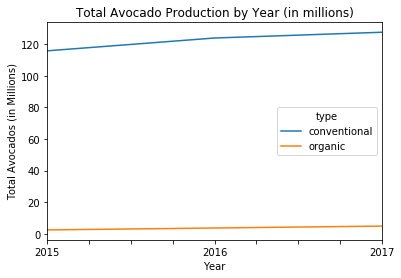

In [29]:
#in millions
consumption_growth = (total_avo_2017 - total_avo_2015) / total_avo_2017
consumption_growth


ax1 = total_avo_volume.plot()
ax1.set_ylabel('Total Avocados (in Millions)')
ax1.set_xlabel('Year')
ax1.set_title('Total Avocado Production by Year (in millions)')
ax1.get_figure().savefig('Resources/screenshots/TotalAvocadoProductionByYear.svg')
consumption_growth

type
conventional    19.771416
organic          4.187297
Name: AveragePrice, dtype: float64

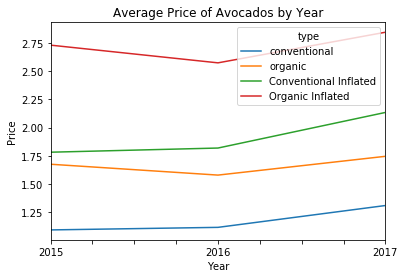

In [33]:
avg_delta = (avg_2017 - avg_2015)/avg_2015
avg_delta = avg_delta*100
avg_df1['Conventional Inflated'] = avg_df1['conventional']*1.63
avg_df1['Organic Inflated'] = avg_df1['organic']*1.63

ax2 = avg_df1.plot()
ax2.set_ylabel('Price')
ax2.set_xlabel('Year')
ax2.set_title('Average Price of Avocados by Year')
ax2.get_figure().savefig('Resources/screenshots/InflationRatesVsPriceByYearOverall.svg')
avg_delta

type
conventional    19.771416
organic          4.187297
Name: AveragePrice, dtype: float64

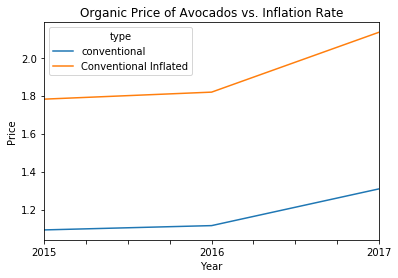

In [35]:
avg_df2 = avg_df1
avg_df2 = avg_df2.drop('organic',1)
avg_df2 = avg_df2.drop('Organic Inflated',1)
avg_df2

ax3 = avg_df2.plot()
ax3.set_ylabel('Price')
ax3.set_xlabel('Year')
ax3.set_title('Organic Price of Avocados vs. Inflation Rate')
ax3.get_figure().savefig('Resources/screenshots/OrganicPriceVsInflation.svg')
avg_delta

type
conventional    19.771416
organic          4.187297
Name: AveragePrice, dtype: float64

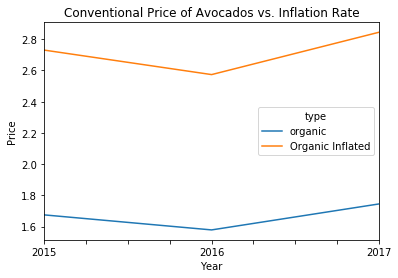

In [36]:
avg_df3 = avg_df1
avg_df3 = avg_df3.drop('conventional',1)
avg_df3 = avg_df3.drop('Conventional Inflated',1)
avg_df3

ax3 = avg_df3.plot()
ax3.set_ylabel('Price')
ax3.set_xlabel('Year')
ax3.set_title('Conventional Price of Avocados vs. Inflation Rate')
ax3.get_figure().savefig('Resources/screenshots/ConventionalPriceVsInflation.svg')
avg_delta